In [49]:
import collections

import pydotplus

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split


%matplotlib inline

In [11]:
TREE_IMAGE_PATH = 'tree.png'

## Load Data and Split Train/Test

In [50]:
iris = load_iris()

X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, test_size=0.2, random_state = 42)

## Creation and Training of the Decision Tree Model

In [60]:
max_tree_depth = 2
model = DecisionTreeClassifier(max_depth=max_tree_depth)
model.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

## Score Evaluation

In [64]:
accuracy = model.score(X_test, Y_test)
accuracy

0.9666666666666667

## Decision Tree Visualization

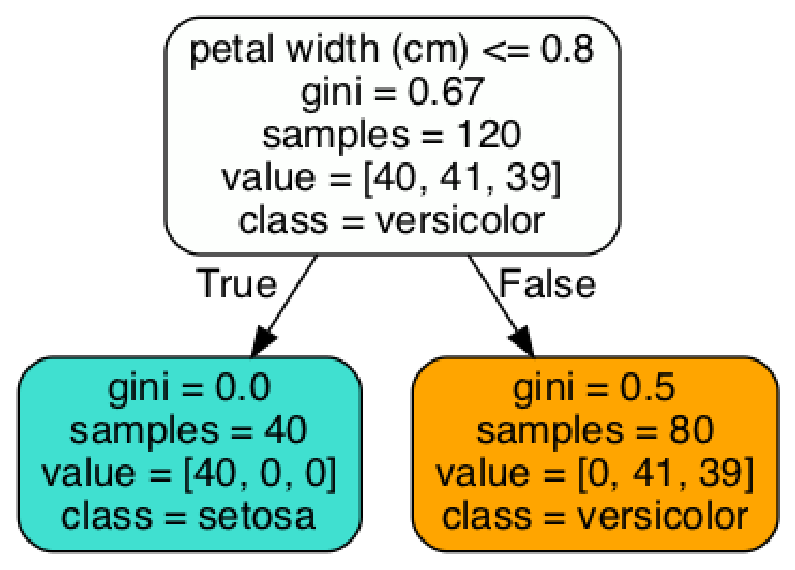

In [12]:
# Export as dot file
dot_data = export_graphviz(model, out_file=None, 
                feature_names = iris.feature_names,
                class_names = iris.target_names,
                rounded = True, proportion = False, 
                precision = 2, filled = True)


graph = pydotplus.graph_from_dot_data(dot_data)

colors = ('turquoise', 'orange')
edges = collections.defaultdict(list)

for edge in graph.get_edge_list():
    edges[edge.get_source()].append(int(edge.get_destination()))

for edge in edges:
    edges[edge].sort()    
    for i in range(2):
        dest = graph.get_node(str(edges[edge][i]))[0]
        dest.set_fillcolor(colors[i])
graph.write_png(TREE_IMAGE_PATH)

# Display in python
import matplotlib.pyplot as plt
plt.figure(figsize = (14, 18))
plt.imshow(plt.imread(TREE_IMAGE_PATH))
plt.axis('off');
plt.show();